In [49]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    "font.size": 26
})

In [30]:
G = {
    "A": [("B", 2), ("C", 5)],
    "B": [("C", 1)],
    "C": [],
}
pos = {
    "A": (0, 0),
    "B": (2, 0),
    "C": (1, 1),
}

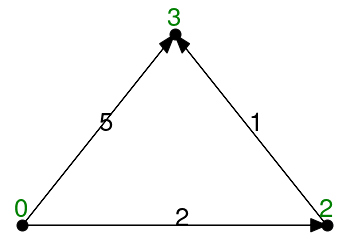

In [74]:
fig, ax = plt.subplots()
ax.axis('off')

dist = {
    "A": 0,
    "B": float("inf"),
    "C": float("inf"),
}
vus = { v: False for v in dist }

def dist_to_str(d):
    if d == float("inf"):
        return "$\infty$"
    return str(d)

P, T, A = {}, {}, {}
for v in pos:
    x, y = pos[v]
    P[v] = ax.scatter(x, y, s=120, color="black")
    T[v] = ax.text(x - 0.05, y + 0.05, dist_to_str(dist[v]))

for u in G:
    for v, w in G[u]:
        A[(u, v)] = ax.arrow(pos[u][0], pos[u][1], pos[v][0] - pos[u][0], pos[v][1] - pos[u][1],
                            length_includes_head=True,
                            head_width=0.07)
        ax.text((pos[u][0] + pos[v][0])/2, (pos[u][1] + pos[v][1])/2, str(w)) 

def dijkstra():
    yield
    while True:
        v_min = -1
        for v in dist:
            if not vus[v] and (v_min == -1 or dist[v] < dist[v_min]):
                v_min = v
        if v_min == -1:
            return
        vus[v_min] = True
        T[v_min].set_color("red")
        yield
        for v, w in G[v_min]:
            A[(v_min, v)].set_color("red")
            yield
            if dist[v_min] + w < dist[v]:
                dist[v] = dist[v_min] + w
                T[v].set_text(dist_to_str(dist[v]))
                yield
            A[(v_min, v)].set_color("black")
        T[v_min].set_color("green")
        yield

dij = dijkstra()
                   
def update(i):
    try:
        next(dij)
    except:
        pass
                   
anim = FuncAnimation(fig, update, frames=20, interval=2000, blit=False)
anim.save('anim.gif')
HTML(anim.to_html5_video())